# The Malleable Glyph Tutorial

Malleable Glyph and this library and this tutorial is a living thing. 
If you have suggestions, questions, problems, **please, [e-mail us](https://www.fit.vut.cz/person/herout/)**.

# Installation and Setup

This code installs the mglyph library and some others, used in this tutorial:

In [ ]:
%pip install mglyph

## Connect to Google Drive for storing the Glyphs *(optional)*

When using in colab, this cell connects to the Google Drive (some prompts will appear, make sure to select the right account).  When using outside of colab, the folder is just `MGlyphs`.

Then, it **makes a folder named `MGlyphs`** in `My Drive/MGlyphs`.  That's where generated glyphs will go to make it really easy to collect them on your computer.

Someone may want to set the `outpath` variable to something different?

In [ ]:
import sys, os

if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    outpath = '/content/drive/MyDrive/MGlyphs'
else:
    outpath = 'MGlyphs'

os.makedirs(outpath, exist_ok=True)

# Now the Malleable Glyph Tutorial, really

## Basics of making a Glyph

The glyph is essentially a function that takes two arguments:
* `x: float` – the glyph parameter, a number between 0.0 and 100.0
* `canvas: mg.Canvas` – the canvas object, where the glyph is to be drawn

For example:
```
def empty_glyph(x: float, canvas: mg.Canvas) -> None:
    pass
```
## Showing the glyph

`mg.show(my_glyph)` shows a few versions of the glyph at different parameter values (by default 10, 30, 50, 70, 90).

Optional arguments of mg.show() are:
* `x=[[10, 50, 90], [5, 6]]` – specifies which glyph sizes to show. A number like `x=50` asks for showing one size. A list of numbers `x=[20, 50, 80]` shows a row of glyphs with the sizes. An aray of lists shows multiple rows with specifies sizes.
* `shadow=True` – show the shadow so that one can see where the glyph itself ends.  `True` by default.
* `background='whitesmoke'` – background of the compound image with multiple glyphs.
* `scale=2.5` – scales the rendered size.  Higher scales (such as 10) are good for examining details and for making samples into slides and publications.

## Drawing a line: `canvas.line()`

`canvas.line((x1, y1), (x2, y2))` draws a line. There are a few optional arguments for customizing the line:
* `width='15p'` – sets the line width.  `'15p'` stands for 15 per mille, size relative to the total glyph size.
* `linecap='round'` – sets the shape of the line ends. Possible line ends: `'butt'`, `'round'`, `'square'`
* `color='blue'` – sets the color. The colors can be for example: [`'darkslateblue'`](https://developer.mozilla.org/en-US/docs/Web/CSS/named-color), `'#483d8b'` is the same color as a hex code, `(0.282, 0.239, 0.545)` is the same color as a triplet of RGB values, and `(0.282, 0.239, 0.545, 0.4)` has 40% alpha (the color is semi-transparent).

## Now the very simplest glyph: `simple_horizontal_line`

Fontconfig warning: "/usr/share/fontconfig/conf.avail/05-reset-dirs-sample.conf", line 6: unknown element "reset-dirs"


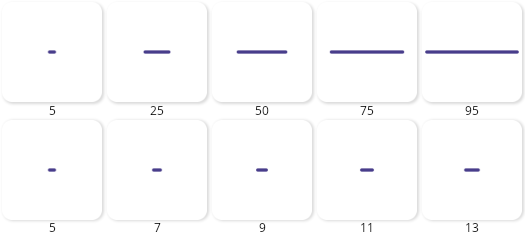

In [2]:
import mglyph as mg

def simple_horizontal_line(x: float, canvas: mg.Canvas) -> None:
    canvas.line((mg.lerp(x, canvas.xcenter, canvas.xleft), canvas.ycenter),    # line start
                (mg.lerp(x, canvas.xcenter, canvas.xright), canvas.ycenter),   # line end
                width='70p', linecap='round', color='darkslateblue')

mg.show(simple_horizontal_line, 
        x=[[5, 25, 50, 75, 95],
           [5, 7, 9, 11, 13]])

## Exporting Glyph for Evaluation: `mg.export()`

* `name=` – title or short description of the glyph. Something like a chapter title in a book.
* `short_name=` – short name for listings and leaderboards of glyphs. Something like a file name.
* `path=` – file to store the glyph into (possibly including the directory path to the file).  The glyph is essentially a `.zip` file with many files in it.  Naming it `xxx.zip` makes sense, naming it `xxx.mglyph` also makes sense.  If the file name contains the string `VERSION`, it is replaced with the version info provided.
* `author=`, `email=` – info about the author.  Optional.  Makes much sense for challenge submissions, so that the challenge organizers can contact the author.
* `version='1.0.0'` – version string.
* `xvalues=np.linspace(0.0, 100.0, 1001)` – specification of what *x*-values to export.  By default, 1001 different *x*-values are exported: 0.0, 0.1, 0.2, 0.3, ... 100.0.  You may export less files or more, e.g. `xvalues=np.linspace(0.0, 100.0, 51)` exports values: 0, 2, 4, ... 100.

In [ ]:
import os
import numpy as np
mg.export(simple_horizontal_line, xvalues=np.linspace(0.0, 100.0, 201),
          name="Simple Horizontal Line", short_name='line',
          path=os.path.join(outpath, "Simple Horizontal Line-VERSION.mglyph"),
          author="Jane Designoff", email="j.designoff@gmail.com", version="1.0.0")

## Interactive visualization

`mg.interact(my_glyph)` runs an interactive playground, where you can tweak the parameter `x` and see what your glyph looks like.

You can use `mg.interact()` with any glyph to play around.

In [ ]:
mg.interact(simple_horizontal_line)

## Visualization by a short video

`mg.show_video(my_glyph)` renders a short video ("GIF") that showcases the glyph.

`ffmpeg` tool must be installed in the system.  Windows installation is nicely [described here](https://www.windowsdigitals.com/install-ffmpeg-windows-11-python/), for Linux, something like `sudo apt install ffmpeg` will work.

Due to some limitations of `matplotlib`, showing of the video needs a bit of some extra code at the moment.

In [ ]:
from IPython.display import HTML
import mglyph as mg
def blue_line(x: float, canvas:mg.Canvas) -> None:
    canvas.line((mg.lerp(x, 0, -1), 0), (mg.lerp(x, 0, 1), 0),
                width='50p', color='navy', linecap='round')
def red_line(x: float, canvas:mg.Canvas) -> None:
    canvas.line((mg.lerp(x, 0, -1), 0), (mg.lerp(x, 0, 1), 0),
                width='20p', color='firebrick', linecap='round')
 
vid = mg.show_video([blue_line, red_line], duration=1.0, reflect=True, scale=2, values=True, fps=60, values_format='.2f')
vid.save(os.path.join(outpath, 'two-lines.mp4'))  # optional saving, can be skipped
HTML(vid.to_html5_video())

## Simple quare of lines `simple_scaled_square` and filled `simple_filled_square`

`mg.lerp(x, from, to)` – interpolates based on the parameter.  When `x==0.0`, the value is equal to `from`, when `x==100.0`, the value is equal to `to`, in between, the value is linearly interpolated.

The canvas knows important values that are usable for interpolating:
* `canvas.xleft`, `canvas.xcenter`, `canvas.xright`
* `canvas.ytop`, `canvas.ycenter`, `canvas.ybottom`
* `canvas.xsize`, `canvas.ysize`
* `canvas.center` – is a tuple of `(canvas.xcenter, canvas.ycenter)`

But for square glyphs, the canvas is set so that the horizontal and vertical coordinates are from -1 to 1.

`canvas.rect(top_left, bottom_right, color='darksalmon')` – draws a rectangle
* `tl: tuple[float, float]` – top-left point
* `br: tuple[float, float]` – bottom-right point
* `color: list[int] | tuple[int] | list[float] | tuple[float] | str = 'black'` – color of lines or fill (depending on `style=`)
* `width: float | str='20p'` – stroke width (`'1p'` is 1/1000 of the glyph dimension)
* `style: str='fill'` – drawing style (`fill` or `stroke`)
* `linecap: str='butt'` – style of the line ends (`'butt'`, `'round'`, `'square'`)
* `linejoin: str='miter'` – style of how the lines are joining (`'miter'`, `'round'`, `'bevel'`)

In [ ]:
def simple_scaled_square(x: float, canvas: mg.Canvas) -> None:
    tl = (mg.lerp(x, 0.0, -1), mg.lerp(x, 0.0, -1.0))
    br = (mg.lerp(x, 0, 1), mg.lerp(x, 0, 1))
    canvas.rect(tl, br, color='darkslategray', style='stroke', width='27p')

def simple_filled_square(x: float, canvas: mg.Canvas) -> None:
    tl = (mg.lerp(x, 0.0, -1), mg.lerp(x, 0.0, -1.0))
    br = (mg.lerp(x, 0, 1), mg.lerp(x, 0, 1))
    canvas.rect(tl, br, color='darksalmon', style='fill')

mg.show(simple_scaled_square)
mg.show(simple_filled_square)

## Rectangle with rounded corners

Each corner can have a different radius (or be sharp, when radius is zero).

In [ ]:
def progress_bar(x: float, canvas: mg.Canvas) -> None:
    for i in range(10):
        canvas.line((mg.lerp(10*i, -1, 1), -0.1), (mg.lerp(10*i, -1, 1), 0.1), 
                    color='darkgray', width='5p')
        canvas.line((mg.lerp(10*i+5, -1, 1), -0.05), (mg.lerp(10*i+5, -1, 1), 0.05), 
                    color='silver', width='5p')
    canvas.rounded_rect((-1, -0.2), (mg.lerp(x, -1, 1), 0.2), 0.05, 0.0, 0.0, 0.05, 
                        style='fill', color='cornflowerblue')
    canvas.rounded_rect((-1, -0.2), (1, 0.2), 0.05, 0.05, 0.05, 0.05, 
                        style='stroke', color='midnightblue', width='20p')

mg.show(progress_bar, scale=5)
HTML(mg.show_video(progress_bar, scale=3, reflect=True).to_html5_video())

## Simple circle: `simple_scaled_circle`, `simple_filled_circle`

`canvas.circle(center, radius, ...)` – draws a circle

In [ ]:
def simple_scaled_circle(x: float, canvas: mg.Canvas) -> None:
  canvas.circle(canvas.center, mg.lerp(x, 0.01, canvas.ysize/2), color='navy', style='stroke', width='20p')

def simple_filled_circle(x: float, canvas: mg.Canvas) -> None:
  canvas.circle(canvas.center, mg.lerp(x, 0.01, canvas.ysize/2), color='navy', style='fill')

mg.show(simple_scaled_circle)
mg.show(simple_filled_circle)

## Simple ellipse: `simple_scaled_ellipse`

`canvas.ellipse(center, radius_x, radius_y, paint)` – draws an ellipse

In [ ]:
def simple_scaled_ellipse(x: float, canvas: mg.Canvas) -> None:
    canvas.ellipse(canvas.center, mg.lerp(x, 0.01, 1), mg.lerp(x, 0.5, 1))

mg.show(simple_scaled_ellipse)

## Five-pointed star: `simple_scaled_star`

`mg.orbit((x, y), angle, radius)` – is a helper function for rotating around a center. `angle` is in radians, starting at north, increasing counter-clockwise. `radius` is the distance of the orbiting point from the center.

The canvas offers the coordinates of the central point `canvas.center` for conveniently orbiting around the glyph center.

`canvas.polygon()` - draws a polygon, filled or its outline
* `vertices: list[tuple[float, float]]` - list of vertices
* `color: list[int] | tuple[int] | list[float] | tuple[float] | str = 'black'` - color
* `width: float | str='20p'` - stroke width (`'1p'` is 1/1000 of the glyph dimension)
* `style: str='fill'` - drawing style (`'fill'` or `'stroke'`)
* `linecap: str='butt'` - style of the line ends (`'butt'`, `'round'`, `'square'`)
* `linejoin: str='miter'` - style of how the lines are joining (`'miter'`, `'round'`, `'bevel'`)
* `closed: bool=True` - polygon closed

In [ ]:
import math

def simple_scaled_star(x: float, canvas: mg.Canvas) -> None:
    center = (0, mg.lerp(x, 0, 0.08))
    radius = mg.lerp(x, 0.01, canvas.ysize/2)
    vertices = []
    for segment in range(5):
        vertices.append(mg.orbit(center, segment * 2*math.pi/5, radius))
        vertices.append(mg.orbit(center, (segment + 0.5) * 2*math.pi/5, math.cos(2*math.pi/5)/math.cos(math.pi/5) * radius))
    canvas.polygon(vertices, color='indigo', closed=True, style='stroke', width='20p', linejoin='round')

def simple_filled_star(x: float, canvas: mg.Canvas) -> None:
    center = (0, mg.lerp(x, 0, 0.08))
    radius = mg.lerp(x, 0.01, canvas.ysize/2)
    vertices = []
    for segment in range(5):
        vertices.append(mg.orbit(center, segment * 2*math.pi/5, radius))
        vertices.append(mg.orbit(center, (segment + 0.5) * 2*math.pi/5, math.cos(2*math.pi/5)/math.cos(math.pi/5) * radius))
    canvas.polygon(vertices, color='indigo', closed=True, style='fill', width='20p', linejoin='round')

mg.show(simple_scaled_star, x=[[5, 25, 50, 75, 95],
                               [0, 2, 4, 6, 8],
                               [92, 94, 96, 98, 100]], scale=2)
mg.show(simple_filled_star, x=[[5, 25, 50, 75, 95],
                               [0, 2, 4, 6, 8],
                               [92, 94, 96, 98, 100]], scale=2)
HTML(mg.show_video(simple_scaled_star, duration=1.0, reflect=True, scale=2, values=True, fps=30).to_html5_video())

## Writing text: `simple_scaled_letter`

`canvas.text(text, position, font, ...)` – draws a piece of text
* `text: str`
* `position: tuple[float, float]` – position of anchor point
* `font: str=None` – name of font used (otherwise system default)
* `size: float | str=None`
* `width: float | str=None`
* `height: float | str=None`
* `font_weight: str='normal'` – one of (`'invisible'`, `'thin'`, `'extra_light'`, `'light'`, `'normal'`, `'medium'`, `'semi_bold'`, `'bold'`, `'extra_bold'`, `'black'`, `'extra_black'`)
* `font_width: str='normal'` – one of (`'ultra_condensed'`, `'extra_condensed'`, `'condensed'`,`'semi_condensed'`, `'normal'`, `'semi_expanded'`, `'expanded'`, `'extra_expanded'`, `'ultra_expanded'`)
* `font_slant: str='upright'` – one of (`'upright'`, `'italic'`, `'oblique'`)
* `color: list[int] | tuple[int] | list[float] | tuple[float] | str = 'black'` – color
* `anchor: str='center'` – anchor point for text placement (`'center'`, `'tl'`, `'bl'`, `'tr'`, `'br'`)

Just one and only one parameter of `size`, `width`, or `height` must be set. `size` means the larger value of width or height of the drawn text.

Fontconfig warning: "/usr/share/fontconfig/conf.avail/05-reset-dirs-sample.conf", line 6: unknown element "reset-dirs"


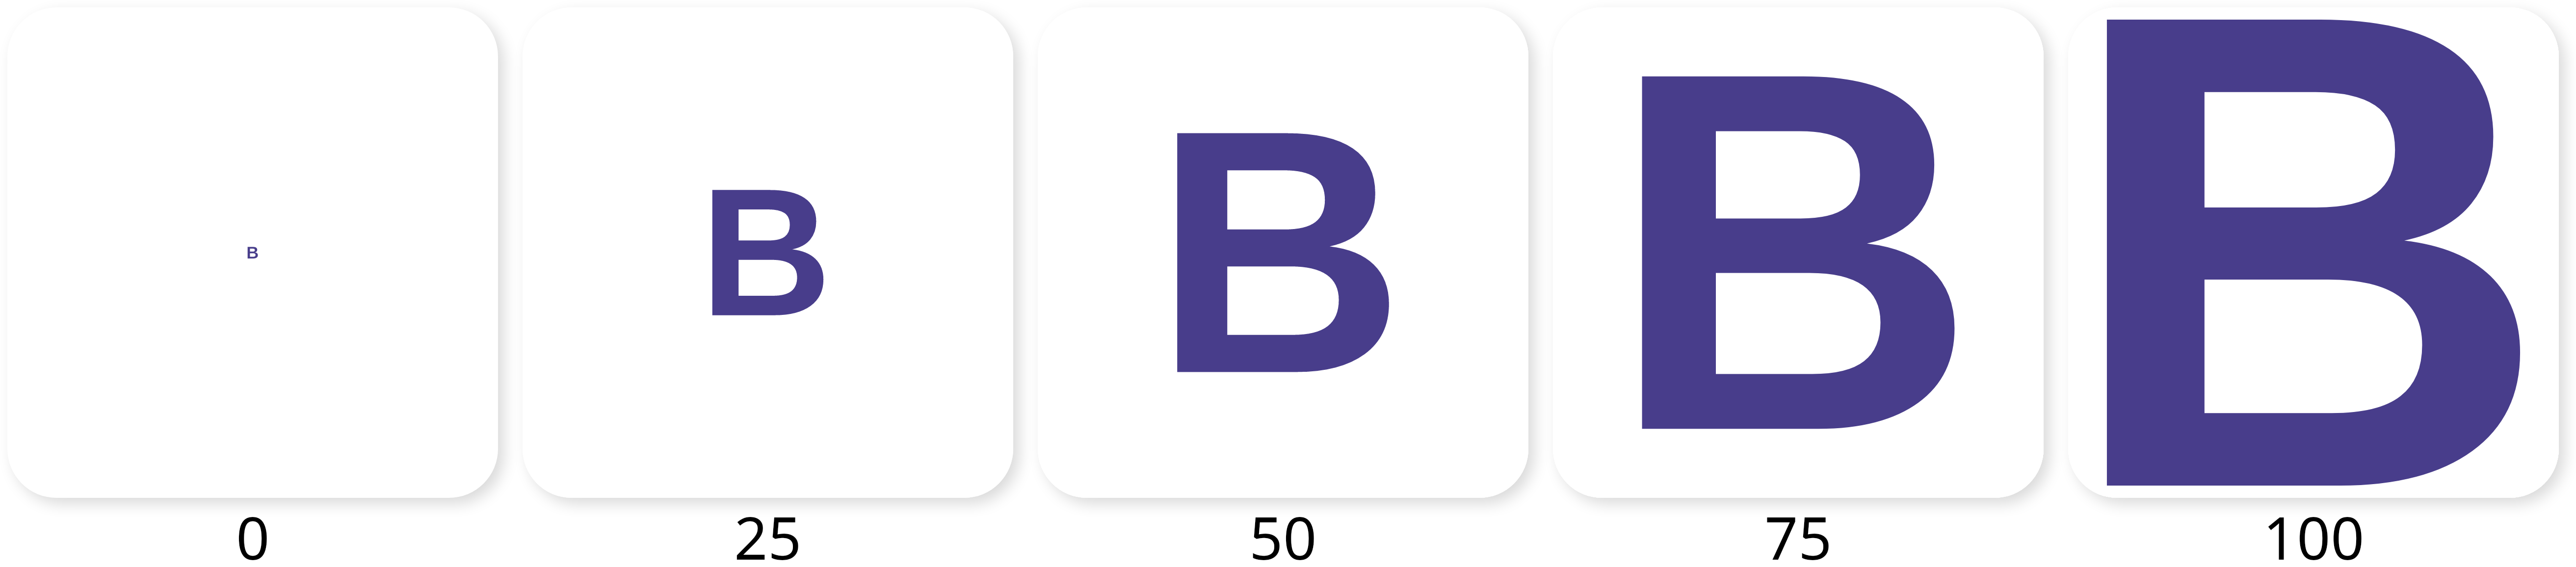

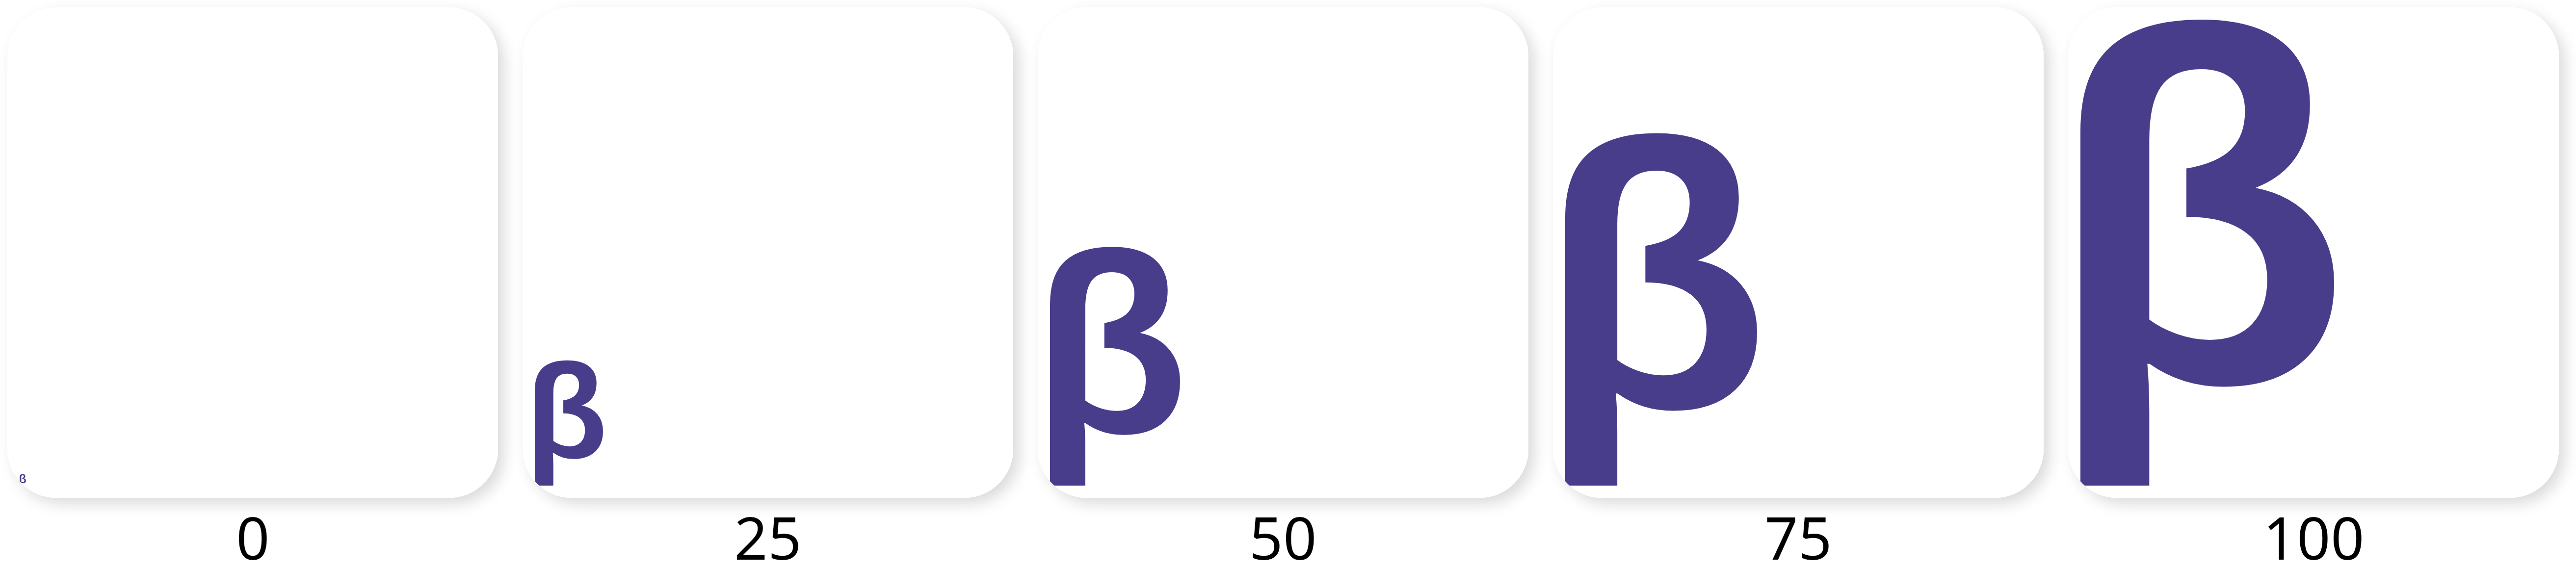

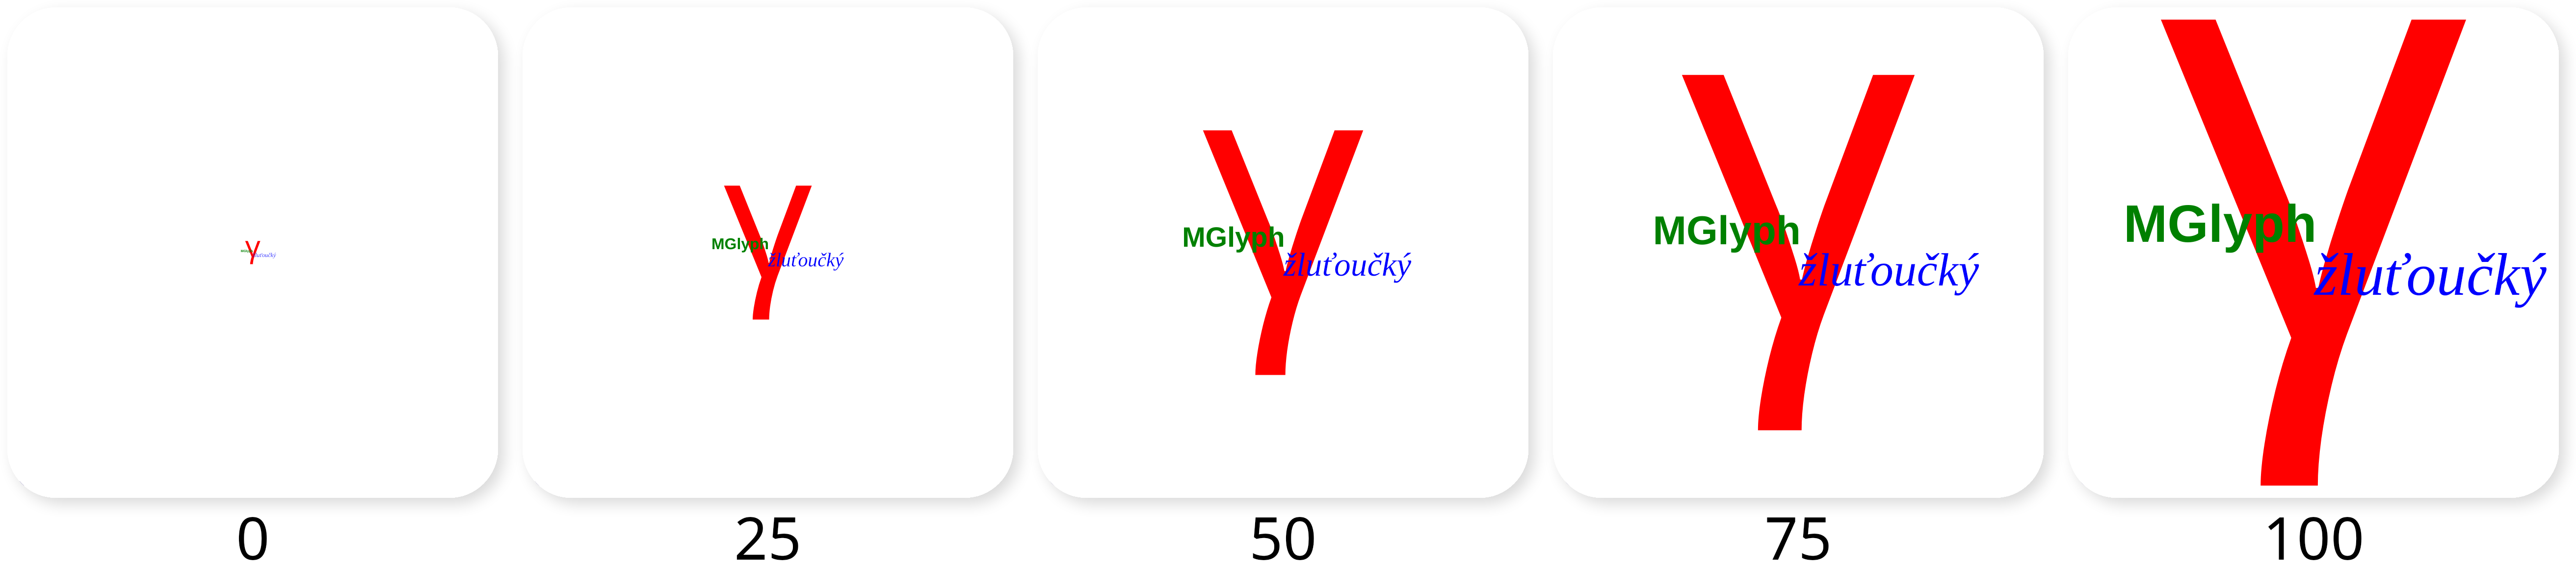

In [1]:
import mglyph as mg
def simple_scaled_letter(x: float, canvas: mg.Canvas) -> None:
    canvas.text('B', (0,0), 'Arial', mg.lerp(x, 0.05, 2.0), 
                anchor='center', color='darkslateblue', font_weight='bold', font_slant='upright')

def scaled_letter_left_bottom(x: float, canvas: mg.Canvas) -> None:
    canvas.text('β', (-1,1), 'Arial', mg.lerp(x, 0.05, 2.0), 
                anchor='bl', color='darkslateblue', font_weight='bold', font_slant='upright')
    
def multi_text(x: float, canvas: mg.Canvas) -> None:
    canvas.text('γ', (0,0), 'Times New', height=mg.lerp(x, 0.1, 2.0), 
                anchor='center', color='red', font_weight='normal', font_slant='upright')
    canvas.text('MGlyph', (0,0), 'Arial', size=mg.lerp(x, 0.05, 0.8), 
                anchor='br', color='green', font_weight='bold', font_slant='upright')
    canvas.text('žluťoučký', (0,0), 'Times New Roman', width=mg.lerp(x, 0.1, 1.0), 
                anchor='tl', color='blue', font_weight='normal', font_slant='italic')
    

mg.show(simple_scaled_letter, x=[0, 25, 50, 75, 100], scale=10)
mg.show(scaled_letter_left_bottom, x=[0, 25, 50, 75, 100], scale=10)
mg.show(multi_text, x=[0, 25, 50, 75, 100], scale=10)

## Three-Handed Clock – Efficient but not eligible as a malleable glyph

An example of a design that **violates the rule of illiteracy**.  

Unfortunately, this design is **not elligible** as a malleable glyph, and similarly, other designs that would use multiple indicators that are combined together, turning into certain graphical **digits** of different **orders**.

In [ ]:
import math
def three_handed_clock(x: float, canvas: mg.Canvas) -> None:
  # draw 12 hour-marks
  for hour in range(12):
    canvas.line(mg.orbit(canvas.center, hour*math.pi/6, 0.8 * canvas.ysize/2),
                mg.orbit(canvas.center, hour*math.pi/6, canvas.ysize/2),
                         linecap='round', color=(0,0,0.5), width='38p')
    canvas.line(mg.orbit(canvas.center, hour*math.pi/6, 0.8 * canvas.ysize/2),
                mg.orbit(canvas.center, hour*math.pi/6, canvas.ysize/2),
                         linecap='round', color='white', width='31p')

  # positions of hands in radians
  hangle = -x/100 * 2*math.pi
  mangle = -x/100 * 12*2*math.pi
  sangle = -x/100 * 60*12*2*math.pi

  # draw clock's hands
  canvas.line(canvas.center, mg.orbit(canvas.center, hangle, 0.62*canvas.ysize/2), 
              linecap='round', color='#333333', width='55p')
  canvas.line(canvas.center, mg.orbit(canvas.center, mangle, 1.0*canvas.ysize/2), 
              linecap='round', color='midnightblue', width='20p', style='stroke')
  canvas.line(mg.orbit(canvas.center, sangle+math.pi, 0.2*canvas.ysize/2),
              mg.orbit(canvas.center, sangle, 1.0*canvas.ysize/2), 
              linecap='round', color='maroon', width='10p', style='stroke')
    
mg.show(three_handed_clock, scale=10, shadow=True, border=False,
        x=[[5, 25, 50, 75, 95],
           ['5.00', 5.01, 5.02, 5.03, 5.04],
           ['61.000', 61.002, 61.004, 61.006, 61.008]])
HTML(mg.show_video(three_handed_clock, duration=5.0, reflect=False, scale=4, values=True, fps=120).to_html5_video())

## One-Handed Clock – This one is elligible

There are three variants, adding static decoration on the clock face.  It is worth testing whether there would be differences and which one performs best!

In [ ]:
def one_handed_clock(x: float, canvas: mg.Canvas) -> None:
  canvas.circle(canvas.center, radius=canvas.ysize/30, color='darkslategray', style='stroke', width='20p')
  angle = -x/100 * 2*math.pi
  canvas.line(mg.orbit(canvas.center, angle+math.pi, 0.18 * canvas.ysize/2),
              mg.orbit(canvas.center, angle, 1.0*canvas.ysize/2),  
              width='10p', linecap='round', color='maroon')

def one_handed_clock_with_hticks(x: float, canvas: mg.Canvas) -> None:
  for hour in range(12):
    canvas.line(mg.orbit(canvas.center, hour*math.pi/6, 0.8 * canvas.ysize/2),
                mg.orbit(canvas.center, hour*math.pi/6, canvas.ysize/2),
                         linecap='round', color=(0,0,0.5), width='38p')
    canvas.line(mg.orbit(canvas.center, hour*math.pi/6, 0.8 * canvas.ysize/2),
                mg.orbit(canvas.center, hour*math.pi/6, canvas.ysize/2),
                         linecap='round', color='white', width='31p')
  one_handed_clock(x, canvas)

def one_handed_clock_with_mticks(x: float, canvas: mg.Canvas) -> None:
  for minute in range(60):
    canvas.line(mg.orbit(canvas.center, minute*math.pi/30, 0.88*canvas.ysize/2),
                mg.orbit(canvas.center, minute*math.pi/30, 1.0*canvas.ysize/2), 
                width='5p', linecap='round', color='black')
  one_handed_clock_with_hticks(x, canvas)

mg.show(one_handed_clock, scale=2,
        x=[[5, 25, 50, 75, 95], [20, 21, 22, 23, 24]])
mg.show(one_handed_clock_with_hticks, scale=2,
        x=[[5, 25, 50, 75, 95], [20, 21, 22, 23, 24]])
mg.show(one_handed_clock_with_mticks, scale=2,
        x=[[5, 25, 50, 75, 95], [20, 21, 22, 23, 24]])

## A Hundred Dots: Another design that is not eligible

This design again uses some kind of **orders** or **digits** - the user wouls see how many rows are filled and how many dots in the last row, like a digit in the order of 10's and units.  This is not allowed.

The question to ask the glyph must be from the domain of "**how much?**", not "**how many?**"

In [ ]:
def hundred_dots(x: float, canvas: mg.Canvas) -> None:
    canvas.tr.scale(0.92)
    base = 10
    for row in range(base):
        for col in range(base):
            if (row*base + col) < mg.lerp(x, 0, base**2):
                canvas.circle(((col/(base-1))*canvas.xsize+canvas.xleft, (row/(base-1))*canvas.ysize+canvas.ytop),
                    radius=canvas.ysize*0.021, color='midnightblue')
            else:
                canvas.circle(((col/(base-1))*canvas.xsize+canvas.xleft, (row/(base-1))*canvas.ysize+canvas.ytop),
                    radius=canvas.ysize*0.009, color='lightslategray')

mg.show(hundred_dots, x=[[5, 25, 50, 75, 95], [20, 21, 22, 23, 24]], scale=10)

## Halton Sequence Dots: This design uses the same dots, but is eligible

A glyph can contain discrete dots.  It only must avoid using **orders** or **digits**.  

The question to ask the glyph here is "**how much?**", i.e. "how much dense are the dots?", instead of "how many dots are there in the last line?"

In [ ]:
from scipy.stats import qmc

def halton_sequence(x: float, canvas: mg.Canvas) -> None:
    sampler = qmc.Halton(d=2, scramble=False)
    sampler.fast_forward(1)
    n = int(mg.lerp(x, 0, 1000))
    points = sampler.random(n=n)
    for i, point in zip(range(n), points):
        canvas.circle((point[0]*canvas.xsize+canvas.xleft, point[1]*canvas.ysize+canvas.ytop),
                      radius=canvas.ysize*0.015, color='midnightblue')

mg.show(halton_sequence)
HTML(mg.show_video(halton_sequence, duration=2.0, reflect=True, scale=4, values=True, fps=60).to_html5_video())

## Fractal Tree

This fractal tree is using built-in transformations:

* `canvas.tr.scale(s)`
* `canvas.tr.translate(x, y)`
* `canvas.tr.rotate(angle)`
* `canvas.tr.push()` and `canvas.tr.pop()`

In [ ]:
def fractal_tree(x: float, canvas: mg.Canvas) -> None:
    angle = x * 0.5
    def branch(length: float, depth: int):
        canvas.line((0, 0), (0, -length), width=canvas.xsize * 0.05 / depth, linecap='round')
        canvas.tr.translate(0, -length)
        if depth < 10:
            canvas.tr.push()
            canvas.tr.rotate(angle)
            branch(length * 0.67, depth + 1)
            canvas.tr.pop()
            canvas.tr.push()
            canvas.tr.rotate(-angle)
            branch(length * 0.67, depth + 1)
            canvas.tr.pop()

    canvas.tr.translate(canvas.xcenter, canvas.ybottom)
    canvas.tr.translate(0, -0.05*canvas.ysize)
    canvas.tr.scale(0.8)
    branch(0.75, 1)

mg.show(fractal_tree, scale=5)

## Shepard Circle: Inspired by the Shepard-Risset Glissando

[Shepard-Risset glissando](https://en.wikipedia.org/wiki/Shepard_tone) served as an inspiration for this glyph:

> A Shepard tone, named after Roger Shepard, is a sound consisting of a superposition of sine waves separated by octaves. When played with the bass pitch of the tone moving upward or downward, it is referred to as the Shepard scale. This creates the auditory illusion of a tone that seems to continually ascend or descend in pitch, yet which ultimately gets no higher or lower. 
> Jean-Claude Risset subsequently created a version of the scale where the tones glide continuously, and it is appropriately called the continuous Risset scale or Shepard–Risset glissando. When done correctly, the tone appears to rise (or fall) continuously in pitch, yet return to its starting note. Risset has also created a similar effect with rhythm in which tempo seems to increase or decrease endlessly.

See and hear this cool video: [Shepard Tone spectrum video visualization](https://en.wikipedia.org/wiki/File:Shepard_Tone_spectrum_video_visualization.webm)

The glyph is equal for $x=0$ and $x=100$ and appears to be always increasing/decreasing.  For example, glyph with $x=80$ would be perceived as naturally lower than $x=10$, about as much lower as $x=40$ to $x=70$.  

Like a volume control in a contemporary car – the volume control is relative and there seems to be no beginning and no end of the volume range.

In [ ]:
def shepard_circle(x: float, canvas: mg.Canvas) -> None:
  base_radius = mg.lerp(x, canvas.ysize/4, canvas.ysize/2)
  base_width = mg.lerp(x, canvas.ysize/100, canvas.ysize/50)
  for r in [2, 1, 1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256]:
    canvas.circle(canvas.center, r*base_radius, style='stroke', color='saddlebrown', width=(r+0.2)*base_width)

mg.show(shepard_circle, x=[0, 25, 50, 75, 100])

## Composite Glyphs

Using digits or orders, like in the Three-Handed Clock or A Hundred Dots is not allows for a malleable glyph.

However, it is allowed to composite the glyph of several *phased* features.  In the following examples, the individual features are four circles, each of them gets their own quadrant of the whole glyph.  But that's just a simple exmample, but no rule – the features can overlap, they can be of different nature (shape, scale, texture, color, anything), whatever. 

**Composite Malleable Glyphs** (or phased glyphs) are legitimate and open space for better and nicer glyphs.

In [ ]:
from IPython.display import display, HTML

def cubic_bezier_point(t:float, a:float, b:float, c:float, d:float) -> (float, float):
    p0 = 0.0  # Start in time (t=0)
    p3 = 1.0  # End in time (t=1)
    x = (1 - t)**3 * p0 + 3 * (1 - t)**2 * t * a + 3 * (1 - t) * t**2 * c + t**3 * p3
    y = (1 - t)**3 * p0 + 3 * (1 - t)**2 * t * b + 3 * (1 - t) * t**2 * d + t**3 * p3
    return x, y

# Bisection method for numerical discovery of t for given x
def cubic_bezier_find_t_for_x(x_target:float, a:float, c:float, epsilon:float=1e-6):
    left, right = 0.0, 1.0
    while right - left > epsilon:
        mid = (left + right) / 2
        x_mid, _ = cubic_bezier_point(mid, a, 0, c, 1)  # Just for the x value
        if x_mid < x_target:
            left = mid
        else:
            right = mid
    return (left + right) / 2

# Function that gets the cubic bezier value y for a given x
def mg_cubic_bezier_for_x(x_target:float, a:float, b:float, c:float, d:float):
    t = cubic_bezier_find_t_for_x(x_target, a, c)
    _, y = cubic_bezier_point(t, a, b, c, d)
    return y

def mg_ease(x: float, fraction: float):
    return 100*mg_cubic_bezier_for_x(x/100, fraction, 0, fraction, 1)

def mg_clamped_linear(x: float, x_start, x_end):
    if x < x_start:
        return 0
    elif x > x_end:
        return 100
    else:
        return 100 * (x - x_start) / (x_end - x_start)

def composite_four_circles(x: float, canvas: mg.Canvas) -> None:
  canvas.circle((-0.5, -0.5), mg.lerp(mg_ease(x, 0), 0.01, canvas.ysize/4),
                color='#1f77b4', style='stroke', width='18p')
  canvas.circle(( 0.5, -0.5), mg.lerp(100*mg_cubic_bezier_for_x(x/100, 1/3, 0, 1/4, 1), 0.01, canvas.ysize/4),
                color='#ff7f0e', style='stroke', width='18p')
  canvas.circle((-0.5,  0.5), mg.lerp(100*mg_cubic_bezier_for_x(x/100, 3/4, 0, 2/3, 1), 0.01, canvas.ysize/4),
                color='#2ca02c', style='stroke', width='18p')
  canvas.circle(( 0.5,  0.5), mg.lerp(mg_ease(x, 1), 0.01, canvas.ysize/4),
                color='#d62728', style='stroke', width='18p')

def composite_four_circles_linear(x: float, canvas: mg.Canvas) -> None:
  canvas.circle((-0.5, -0.5), mg.lerp(mg_clamped_linear(x, 0, 25), 0.01, canvas.ysize/4),
                color='#1f77b4', style='stroke', width='18p')
  canvas.circle(( 0.5, -0.5), mg.lerp(mg_clamped_linear(x, 25, 50), 0.01, canvas.ysize/4),
                color='#ff7f0e', style='stroke', width='18p')
  canvas.circle((-0.5,  0.5), mg.lerp(mg_clamped_linear(x, 50, 75), 0.01, canvas.ysize/4),
                color='#2ca02c', style='stroke', width='18p')
  canvas.circle(( 0.5,  0.5), mg.lerp(mg_clamped_linear(x, 75, 100), 0.01, canvas.ysize/4),
                color='#d62728', style='stroke', width='18p')

mg.show(composite_four_circles, scale=10, values=False,
        x=[5, 30, 60, 62, 64]) 
mg.show(composite_four_circles_linear, scale=10,
        x=[5, 30, 60, 62, 64]) 

display(HTML("<h3>Simple Scaled Circle – for reference</h3>"))
mg.show(simple_scaled_circle, x=[[20, 21, 22, 23, 24],
                                   [40, 41, 42, 43, 44],
                                   [50, 51, 52, 53, 54]])
display(HTML("<h3>Composite Four Circles – with cubic bezier scaling</h3>"))
mg.show(composite_four_circles, x=[[20, 21, 22, 23, 24],
                                   [40, 41, 42, 43, 44],
                                   [50, 51, 52, 53, 54]])
display(HTML("<h3>Composite Four Circles – with linear scaling</h3>"))
mg.show(composite_four_circles_linear, x=[[20, 21, 22, 23, 24],
                                          [40, 41, 42, 43, 44],
                                          [50, 51, 52, 53, 54]])

The composite examples are using two different scalings for the phasing: Cubic Bézier and Linear.

The four circles are scaled as shown in the plots below.  The Cubic Bézier appears to be more elegant, the linear is probably more powerful.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 100, 256)

def show_cubic_bezier(axis, a, b, c, d):
    y = list(map(lambda x: 100*mg_cubic_bezier_for_x(x/100, a, b, c, d), x))
    axis.plot(x, y, label=f'cubic-bezier({a}, {b}, {c}, {d})')

def show_clamped_linear(axis, x_start, x_end):
    y = list(map(lambda x: mg_clamped_linear(x, x_start, x_end), x))
    axis.plot(x, y, label=f'clamped-linear({x_start}, {x_end})')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3), layout='constrained')

show_cubic_bezier(ax1, 0, 0, 0, 1)
show_cubic_bezier(ax1, 1/3, 0, 1/4, 1)
show_cubic_bezier(ax1, 3/4, 0, 2/3, 1)
show_cubic_bezier(ax1, 1, 0, 1, 1)
ax1.set(xlabel="Input $x$ value", ylabel='Modified $x$ value', title="Cubic-Bézier")
ax1.grid(True)

show_clamped_linear(ax2, 0, 25)
show_clamped_linear(ax2, 25, 50)
show_clamped_linear(ax2, 50, 75)
show_clamped_linear(ax2, 75, 100)
ax2.set(xlabel="Input $x$ value", ylabel=None, title="Linear")
ax2.grid(True)

## Let us export all the eligible designs from the tutorial

And even the non-elligible ones: Three-Handed Clock and One Hundred Dots

In [ ]:
xvalues=np.linspace(0.0, 100.0, 1001)

mg.export(simple_horizontal_line, xvalues=xvalues,
          name="Simple Horizontal Line", short_name='line',
          path=os.path.join(outpath, "Simple Horizontal Line-VERSION.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")

mg.export(simple_scaled_square, xvalues=xvalues,
          name="Simple Scaled Square", short_name='square',
          path=os.path.join(outpath, "Simple Scaled Square-VERSION.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")
mg.export(simple_filled_square, xvalues=xvalues,
          name="Simple Filled Square", short_name='fsquare',
          path=os.path.join(outpath, "Simple Filled Square-VERSION.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")
mg.export(simple_scaled_circle, xvalues=xvalues,
          name="Simple Scaled Circle", short_name='circle',
          path=os.path.join(outpath, "Simple Scaled Circle-VERSION.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")
mg.export(simple_filled_circle, xvalues=xvalues,
          name="Simple Filled Circle", short_name='fcircle',
          path=os.path.join(outpath, "Simple Filled Circle-VERSION.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")
mg.export(simple_scaled_star, xvalues=xvalues,
          name="Simple Scaled Star", short_name='star',
          path=os.path.join(outpath, "Simple Scaled Star-VERSION.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")
mg.export(simple_filled_star, xvalues=xvalues,
          name="Simple Filled Star", short_name='fstar',
          path=os.path.join(outpath, "Simple Filled Star-VERSION.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")

mg.export(three_handed_clock, xvalues=np.linspace(0.0, 100.0, 10001),
          name="One-Handed Clock", short_name='clock',
          path=os.path.join(outpath, "One-Handed Clock-VERSION.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")

mg.export(one_handed_clock, xvalues=np.linspace(0.0, 100.0, 5001),
          name="One-Handed Clock", short_name='clock',
          path=os.path.join(outpath, "One-Handed Clock-VERSION.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")
mg.export(one_handed_clock_with_hticks, xvalues=np.linspace(0.0, 100.0, 5001),
          name="One-Handed Clock with Hours", short_name="clock-hours",
          path=os.path.join(outpath, "One-Handed Clock with Hours-VERSION.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")
mg.export(one_handed_clock_with_mticks, xvalues=np.linspace(0.0, 100.0, 5001),
          name="One-Handed Clock with Minutes", short_name="clock-minutes",
          path=os.path.join(outpath, "One-Handed Clock with Minutes-VERSION.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")

mg.export(hundred_dots, xvalues=xvalues,
          name="One Hundred Dots", short_name="halton-sequence",
          path=os.path.join(outpath, "One Hundred Dots-VERSION.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")
mg.export(halton_sequence, xvalues=xvalues,
          name="Dots Scattered by Halton Sequence", short_name="halton-sequence",
          path=os.path.join(outpath, "Dots Scattered by Halton Sequence-VERSION.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")

mg.export(fractal_tree, xvalues=xvalues,
          name="Simple Fractal Tree", short_name="fractal-tree",
          path=os.path.join(outpath, "Simple Fractal Tree-VERSION.mglyph"),
          author="Adam Herout", email="herout@vut.cz", version="1.0.0")